In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import pymc3 as pm
import pandas as pd
from pymc3.distributions.timeseries import GaussianRandomWalk


import numpy as np
import pandas as pd

import statsmodels # a statistics library we mentionned at the beginning of the semester
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller #tools

import matplotlib.pyplot as plt

from scipy import optimize

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python27\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import pymc3 as pm
import pandas as pd
from pymc3.distributions.timeseries import GaussianRandomWalk


import numpy as np
import pandas as pd

import statsmodels # a statistics library we mentionned at the beginning of the semester
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller #tools

import matplotlib.pyplot as plt

from scipy import optimize

### Modeling X's daily returns  from a normal distribution. Then we perform a cumulative sum to get the value of X on each day.

#### Modeling Y. We model this by taking X, shifting it up and adding some random noise drawn from a normal distribution.

In [17]:
## Testing for co-integration
# compute the p-value of the cointegration test# compute 
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X1,X2)

print pvalue

0.08980893512324839


In [61]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
    return pvalue

### Reading stock market data. Downloaded historical data for 10 years
### 1. Carnival Plc(CUK) https://finance.yahoo.com/quote/CUK
### 2. China Unicom (Hong Kong) Limited (CHU) https://finance.yahoo.com/quote/CHU

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
# ibm = pd.DataFrame.from_csv('IBM_NEW.csv')
# qcom = pd.DataFrame.from_csv('QCOM_NEW.csv') 
# ibm.head()

# Visa = pd.DataFrame.from_csv('Visa_10years.csv')
# Mc = pd.DataFrame.from_csv('Mc_10years.csv') 


CUK = pd.DataFrame.from_csv('CUK_new.csv')
CCL = pd.DataFrame.from_csv('CCL_new.csv') 

# Visa = pd.DataFrame.from_csv('Visa_new.csv')
# Mc = pd.DataFrame.from_csv('MasterCard_new.csv') 
CCL.head()

c:\python27\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # This is added back by InteractiveShellApp.init_path()
c:\python27\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if sys.path[0] == '':


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-11,36.450001,36.660000,36.150002,36.389999,29.509018,4303800
2011-07-12,36.009998,36.439999,35.759998,35.830002,29.054913,5376900
2011-07-13,36.060001,36.610001,35.880001,36.009998,29.200863,3691900
2011-07-14,35.810001,35.880001,34.680000,35.310001,28.633232,5787700
2011-07-15,35.340000,35.439999,34.910000,35.189999,28.535917,2971500


In [64]:
find_cointegrated_pairs(CCL)

(array([[  0.        ,  -9.87045219,  -8.11540883, -15.11641511,
          -4.22420945,  -0.78069356],
        [  0.        ,   0.        ,  -7.05187427,  -9.23823758,
          -3.44394529,  -0.52166802],
        [  0.        ,   0.        ,   0.        ,  -6.31112764,
          -4.21116485,  -0.78588672],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          -3.70284027,  -0.50061433],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  -0.24767556],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ]]),
 array([[1.00000000e+00, 5.27158584e-16, 1.54840166e-11, 6.37252265e-27,
         3.35134595e-03, 9.37194032e-01],
        [1.00000000e+00, 1.00000000e+00, 6.45464948e-09, 2.14227819e-14,
         3.76986512e-02, 9.62752749e-01],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.36188509e-07,
         3.50823017e-03, 9.36533331e-01],
        [1.00000000e+00, 1.00000000

In [40]:
# X1 = ibm['High']
# X2 = qcom['High']

# X1 = Visa['High']
# X2 = Mc['High']


X1 = CUK['High']
X2 = CCL['High']

In [41]:
score, correlation, _ = coint(X1,X2)

print correlation

0.08980893512324839


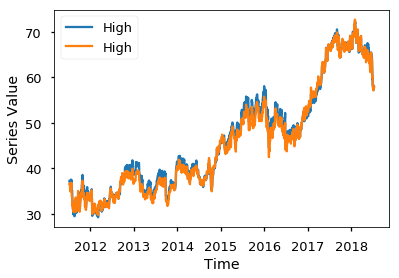

In [19]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

#### Looks like 'Carnival Plc' and 'China Unicom' are cointegrated over a period of time

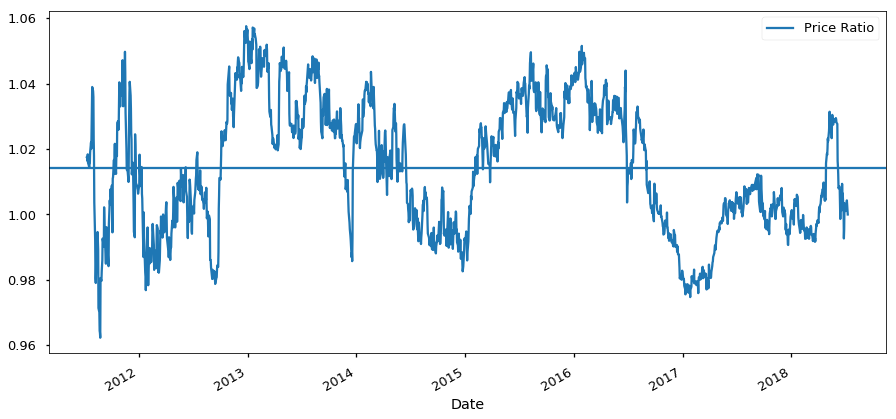

In [21]:
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
# score, pvalue, _ = coint(X1, X2)
# print(pvalue)
ratios = X1 / X2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

#### The ratio does look like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. Z score is defined as:

Z Score (Value) = (Value — Mean) / Standard Deviation

### A p value less than 0.01 shows that the the 2 timeseries is stationary

In [22]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

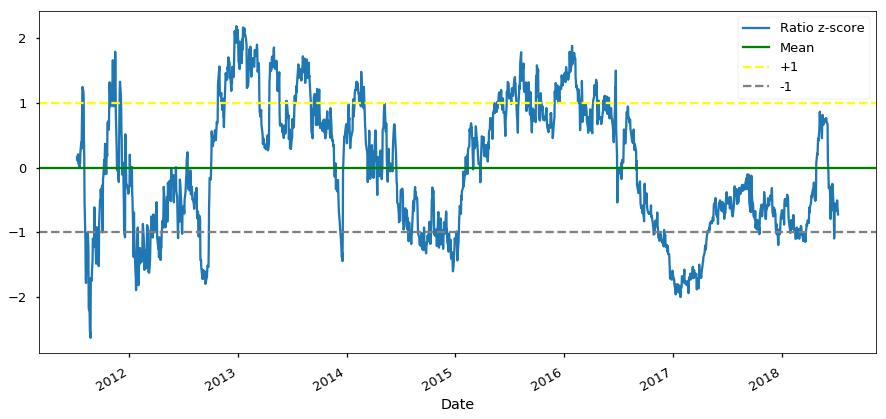

In [26]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='green')
plt.axhline(1.0, color='yellow', linestyle='--')
plt.axhline(-1.0, color='gray', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

#### Let's use a very simple linear regression (least squares, from statsmodels) to compute β, the linear fit coefficient.

In [32]:
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

# Get rid of the constant column
X1 = CCL['High']
# X2=Mc['High']
results.params

const   -0.741789
High     1.002726
dtype: float64

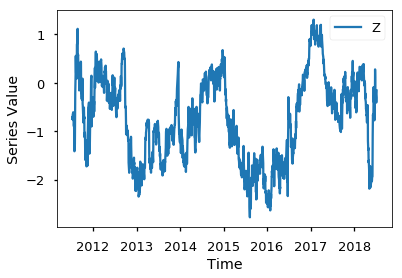

p-value = -3.0576265506577256 The series Z is likely stationary.


True

In [65]:
beta = results.params['High']
Z = X2 - beta * X1
Z.name = 'Z'

plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

check_for_stationarity(Z)


#### We can see that the resulting Z is likely  stationary over the time frame we looked at. And this makes sense because stock prices of both Carnival Plc and China Unicom are co-integrated, meaning they are a better pair for trading

In [66]:
def check_for_stationarity(X, cutoff=0.01):
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[0]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')
        return False

In [67]:
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(X1, X2)
print(pvalue)

0.08980893512324839


In [68]:
ratios = CCL['High'] / CUK['High']
print(len(ratios))

1761


In [69]:
import numpy as np
import pymc3 as pm
n = 400
# CUK = np.genfromtxt(pm.get_data("CUK.csv"))
CUK = pd.DataFrame.from_csv("CUK_new.csv")
CUK[:5]

c:\python27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-11,36.930000,37.299999,36.930000,37.139999,30.826595,118600
2011-07-12,36.669998,37.070000,36.459999,36.509998,30.303673,112300
2011-07-13,36.799999,37.209999,36.480000,36.680000,30.444784,81600
2011-07-14,36.330002,36.540001,35.549999,36.009998,29.888674,120400
2011-07-15,35.919998,36.000000,35.650002,35.820000,29.730976,156800


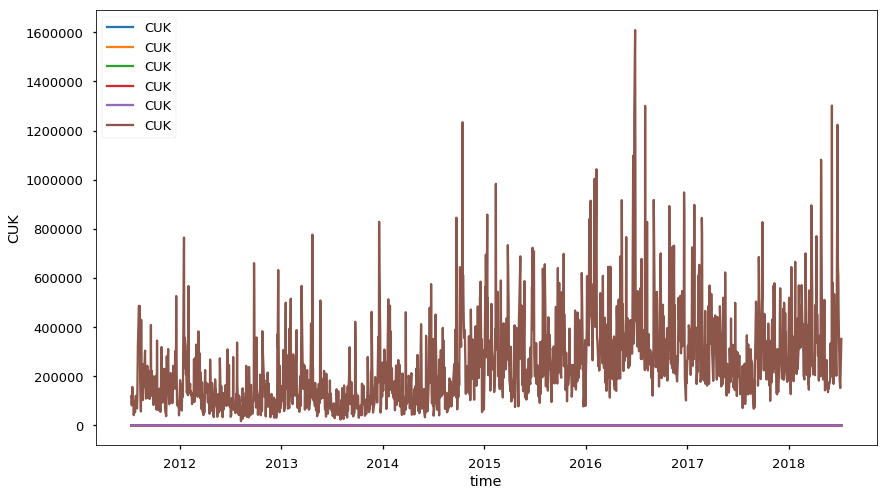

In [70]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(CUK, label='CUK')
ax.set(xlabel='time', ylabel='CUK')
ax.legend();

In [50]:
from pymc3.distributions.timeseries import GaussianRandomWalk
with pm.Model() as model:
    step_size = pm.Exponential('sigma', 50.)
    s = GaussianRandomWalk('s', sd=step_size,
                           shape=len(CUK))

    nu = pm.Exponential('nu', .1)

#     r = pm.StudentT('r', nu=nu,
#                     lam=pm.math.exp(-2*s),
#                     observed=CUK)

In [ ]:
with model:
    trace = pm.sample(tune=500, nuts_kwargs=dict(target_accept=.9)) 

In [ ]:
fig, ax = plt.subplots()

plt.plot(trace['s'].T, 'b', alpha=.03);
ax.set(title=str(s), xlabel='time', ylabel='log volatility');

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(returns)
ax.plot(np.exp(trace[s].T), 'r', alpha=.03);
ax.set(xlabel='time', ylabel='CUK')
ax.legend(['CUK', 'stoch vol']);

##### Simple Pair Trading Strategy:
Go "Long" the ratio whenever the z-score is below -1.0
Go "Short" the ratio when the z-score is above 1.0
Exit positions when the z-score approaches zero
This is just the tip of the iceberg, and only a very simplistic example to illustrate the concepts.

In practice you would want to compute a more optimal weighting for how many shares to hold for S1 and S2
You would also want to trade using constantly updating statistics.
In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data.

Instead of using ratio values, let's use 5d Moving Average to compute to z score, and the 60d Moving Average and 60d Standard Deviation as the mean and standard deviation.

First break the data into training set of 7 years and test set of 3 years

In [71]:
train = ratios[:1232]
test = ratios[529:]

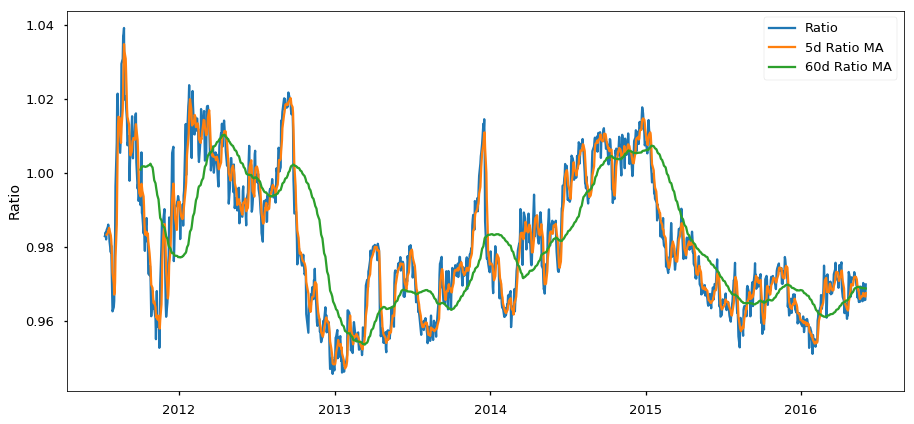

In [51]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()

std_60 = train.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

##### We can use the moving averages to compute the z-score of the ratio at each given time. This will tell us how extreme the ratio is and whether it's a good idea to enter a position at this time. Let's take a look at the z-score now.

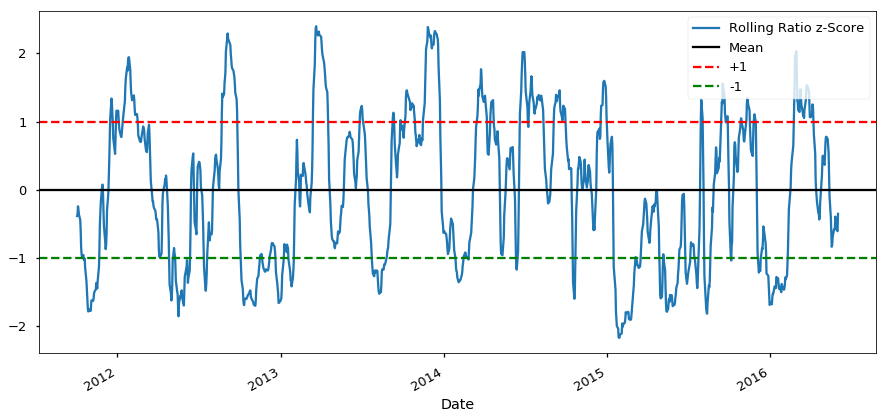

In [52]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

##### Spread-based trading strategy


If $X_t$ and $Y_t$ are cointegrated stocks, then spread = $\log(Y_t) - (\alpha + \beta \log(X_t))$

If the spread is very high, buy $X_t$, sell $Y_t$. If the spread is very low, buy $Y_t$, sell $X_t$.

So, find two likely cointegrated stocks, estimate spreads, check stationarity, create trading signal, verify.

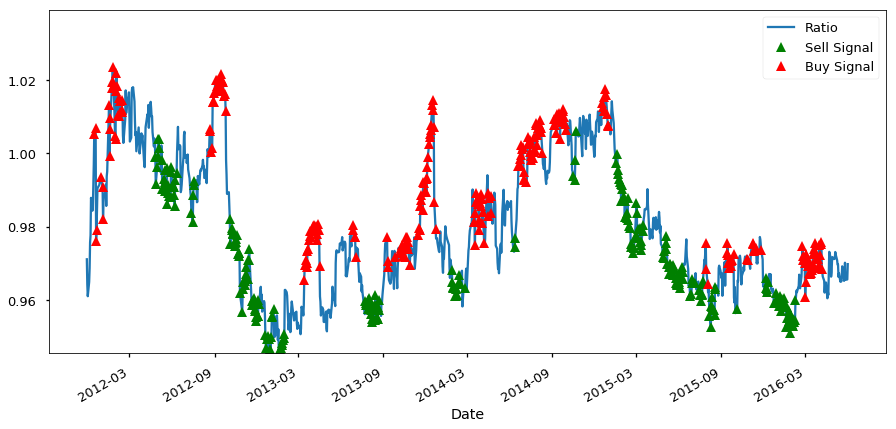

In [76]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[100:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[100:].plot(color='g', linestyle='None', marker='^')
sell[100:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Sell Signal', 'Buy Signal'])
plt.show()

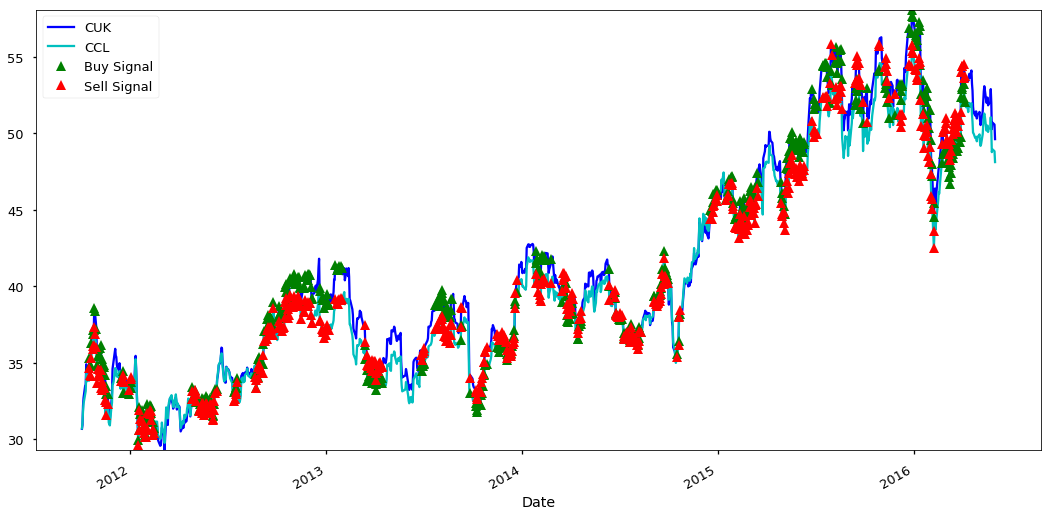

In [77]:

# Plot the prices and buy and sell signals from z score# Plot t 
plt.figure(figsize=(18,9))
S1 = CUK['High'].iloc[:1232]
S2 = CCL['High'].iloc[:1232]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))

plt.legend(['CUK','CCL', 'Buy Signal', 'Sell Signal'])
plt.show()

#### buy 1 Carnival Plc stock and sell ratio x China Unicom stock when ratio is low, sell 1 ratio sell 1 Carnival Plc stock and buy ratio x China Unicom stock when it’s high

In [57]:

# Trade using a simple strategy# Trade u 
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] - S2[i] * countS2
            count = 0
            
    return money

trade(CUK['High'].iloc[:1232], CCL['High'].iloc[:1232], 60, 5)

305878.7761053099

Money earned 

In [79]:
##Mcmc model
n = 400
#returns = np.genfromtxt(pm.get_data("SP500.csv"))
returns = pd.DataFrame.from_csv("CCL_new.csv")
returns[:6]

c:\python27\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-11,36.450001,36.660000,36.150002,36.389999,29.509018,4303800
2011-07-12,36.009998,36.439999,35.759998,35.830002,29.054913,5376900
2011-07-13,36.060001,36.610001,35.880001,36.009998,29.200863,3691900
2011-07-14,35.810001,35.880001,34.680000,35.310001,28.633232,5787700
2011-07-15,35.340000,35.439999,34.910000,35.189999,28.535917,2971500
2011-07-18,34.680000,34.950001,34.380001,34.730000,28.162901,3874100


In [ ]:
with pm.Model() as model:
    step_size = pm.Exponential('sigma', 50.)
    s = GaussianRandomWalk('s', sd=step_size,
                           shape=len(returns))

    nu = pm.Exponential('nu', .1)

    r = pm.StudentT('r', nu=nu,
                    lam=pm.math.exp(-2*s),
                    observed=returns)

In [ ]:
with model:
    trace = pm.sample(tune=500, nuts_kwargs=dict(target_accept=.9)) 

In [ ]:
fig, ax = plt.subplots()

plt.plot(trace['s'].T, 'b', alpha=.03);
ax.set(title=str(s), xlabel='time', ylabel='log volatility');